In [48]:
import numpy as np
import pandas as pd

pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_columns', None)

In [49]:
data = pd.read_csv('D:\Yogabar\Solution\scraped_reviews_data.csv')

In [50]:
data.head()

,reviews
0,\r\n\r\n It's very tasty and affordable and filled with all the goodies needed for your diet\r\n\r\n
1,"\r\n\r\n I really want to applaud the ppl at yogabar who come up with such great combinations, the perfect taste, they have mastered the art of what will taste the best with what. I’m so happy with all the ingredients and how they complement each other and taste great with milk/yoghurt! Best buy!\r\n\r\n"
2,"\r\n\r\n Morning breakfast is now easy with this delicious crunchy muesli. Me being a fruits and nuts lover, loved it and it has all berries which gives awesome taste. All healthy ingredients like oats, brown rice flakes, raisins, cranberries, apricots. Black currants ,quinoa, pumpkin, chia and flax seeds, this is a combined mixture of all healthy foods. Just 200 calories and I am sorted in morning. Tastes best with cold milk. Even it makes a great dry snacking option anytime during the day. Perfect when you are on balanced diet and will recommend you all to give it a try.\r\n\r\n"
3,"\r\n\r\n I'm a big fan of Yogabar range of Mueslis and order them frequently. I decided to buy the 700 gm super saver pack when it was cheaper during the great Indian sale. Got it for Rs 349. However, the pack was full of lumps rather than the usual consistency. It was really annoying as it altered the taste a lot. All the lumps were overtly sweet and rest of the muesli was dry and tasteless. Moreover, they didn't dissolve in milk and by the time it did, the rest of the cereal got soggy. I really hope it was a one time thing and won't happen again in the future. I'm still waiting to hear from Yogabars.Hope this review is helpful.\r\n\r\n"
4,"\r\n\r\n Quality of product has deteriorated badly. The two boxes I purchased got ""burnt grains"". Also some of the seeds float when milk is put, meaning the company is now using expired items. Even the rasins are put like lump of balls...Only thing that is good is the packing... not the actual product.Anyway, this company planned that they will initially gain customer confidence, get good rating and later give 3rd class product.Very disappointing...\r\n\r\n"


In [51]:
df = data.copy()
df.replace(to_replace=[r"\\t|\\n|\\r", "\t|\n|\r"], value=["",""], regex=True, inplace=True)

In [52]:
df.head()

,reviews
0,It's very tasty and affordable and filled with all the goodies needed for your diet
1,"I really want to applaud the ppl at yogabar who come up with such great combinations, the perfect taste, they have mastered the art of what will taste the best with what. I’m so happy with all the ingredients and how they complement each other and taste great with milk/yoghurt! Best buy!"
2,"Morning breakfast is now easy with this delicious crunchy muesli. Me being a fruits and nuts lover, loved it and it has all berries which gives awesome taste. All healthy ingredients like oats, brown rice flakes, raisins, cranberries, apricots. Black currants ,quinoa, pumpkin, chia and flax seeds, this is a combined mixture of all healthy foods. Just 200 calories and I am sorted in morning. Tastes best with cold milk. Even it makes a great dry snacking option anytime during the day. Perfect when you are on balanced diet and will recommend you all to give it a try."
3,"I'm a big fan of Yogabar range of Mueslis and order them frequently. I decided to buy the 700 gm super saver pack when it was cheaper during the great Indian sale. Got it for Rs 349. However, the pack was full of lumps rather than the usual consistency. It was really annoying as it altered the taste a lot. All the lumps were overtly sweet and rest of the muesli was dry and tasteless. Moreover, they didn't dissolve in milk and by the time it did, the rest of the cereal got soggy. I really hope it was a one time thing and won't happen again in the future. I'm still waiting to hear from Yogabars.Hope this review is helpful."
4,"Quality of product has deteriorated badly. The two boxes I purchased got ""burnt grains"". Also some of the seeds float when milk is put, meaning the company is now using expired items. Even the rasins are put like lump of balls...Only thing that is good is the packing... not the actual product.Anyway, this company planned that they will initially gain customer confidence, get good rating and later give 3rd class product.Very disappointing..."


In [53]:
import nltk
import string
from nltk.corpus import stopwords
from nltk import PorterStemmer

In [54]:
import string   
import re

In [55]:
def remove_punct_emoji(text):
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    return text.encode('ascii', 'ignore').decode('ascii')

df['reviews_punct'] = df['reviews'].apply(lambda x: remove_punct_emoji(x))

In [56]:
def tokenize(text):
    text = re.split('\W+', text)
    return text

df['reviews_tokenized'] = df['reviews_punct'].apply(lambda x: tokenize(x.lower()))

In [57]:
stopword = nltk.corpus.stopwords.words('english')
def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text
    
df['reviews_nonstop'] = df['reviews_tokenized'].apply(lambda x: remove_stopwords(x))

In [58]:
ps = nltk.PorterStemmer()

def stemming(text):
    text = [ps.stem(word) for word in text]
    return text

df['reviews_stemmed'] = df['reviews_nonstop'].apply(lambda x: stemming(x))

In [59]:
df.sample(10)

,reviews,reviews_punct,reviews_tokenized,reviews_nonstop,reviews_stemmed
141,It's good . Not excellent for sure. You would need to add sugar to make it sweet.Otherwise it's good.Bit expensive though,Its good Not excellent for sure You would need to add sugar to make it sweetOtherwise its goodBit expensive though,"[, its, good, not, excellent, for, sure, you, would, need, to, add, sugar, to, make, it, sweetotherwise, its, goodbit, expensive, though]","[, good, excellent, sure, would, need, add, sugar, make, sweetotherwise, goodbit, expensive, though]","[, good, excel, sure, would, need, add, sugar, make, sweetotherwis, goodbit, expens, though]"
753,It’s really gud !,Its really gud,"[, its, really, gud, ]","[, really, gud, ]","[, realli, gud, ]"
631,The taste was good and was full of nuts and seeds,The taste was good and was full of nuts and seeds,"[, the, taste, was, good, and, was, full, of, nuts, and, seeds]","[, taste, good, full, nuts, seeds]","[, tast, good, full, nut, seed]"
16,I am finding someone to help me to finish the packet. This might have corn syrup mixed. extremely sweet by taste and a scent. Its really hard to finish the packet by me.,I am finding someone to help me to finish the packet This might have corn syrup mixed extremely sweet by taste and a scent Its really hard to finish the packet by me,"[, i, am, finding, someone, to, help, me, to, finish, the, packet, this, might, have, corn, syrup, mixed, extremely, sweet, by, taste, and, a, scent, its, really, hard, to, finish, the, packet, by, me]","[, finding, someone, help, finish, packet, might, corn, syrup, mixed, extremely, sweet, taste, scent, really, hard, finish, packet]","[, find, someon, help, finish, packet, might, corn, syrup, mix, extrem, sweet, tast, scent, realli, hard, finish, packet]"
21,"This is a perfect beginning for anyone in the morning.It fulfills body and mind requirements in a balanced manner.1. Light yet filling breakfast high in nutrition.2. Rich in Nuts and dried fruits: Almonds, Raisins, Dried Cranberries.3. Rich in Seeds: Pumpkin, Chia and Flax.4. Fibre rich fruits and nuts, this fruits, nuts and seeds muesli will kickstart your mornings and unlock the power of your day.5. Last but not the least the taste will also satisfy you.INGREDIENTSWhole Grains 50% (Rolled Oats, Brown Rice Flakes),Dried Fruit 22% (Raisins, Cranberries, Apricots, Blackcurrants),Seeds 18% (Quinoa, Pumpkin, Chia, Flax), Almonds, Soy Protein Flakes, Rice Bran Oil, Jaggery, Himalayan Pink Salt.HOW TO USEJust add the muesli to your bowl of milk. Pour some milk of your choice. Milk can also be replaced with yoghurt, cream or as a topping for desserts. You can also enjoy the taste as it is.Amazon delivery was flawless.Packaging was fine.Please check my video and pictures for better idea.Thank you.",This is a perfect beginning for anyone in the morningIt fulfills body and mind requirements in a balanced manner Light yet filling breakfast high in nutrition Rich in Nuts and dried fruits Almonds Raisins Dried Cranberries Rich in Seeds Pumpkin Chia and Flax Fibre rich fruits and nuts this fruits nuts and seeds muesli will kickstart your mornings and unlock the power of your day Last but not the least the taste will also satisfy youINGREDIENTSWhole Grains Rolled Oats Brown Rice FlakesDried Fruit Raisins Cranberries Apricots BlackcurrantsSeeds Quinoa Pumpkin Chia Flax Almonds Soy Protein Flakes Rice Bran Oil Jaggery Himalayan Pink SaltHOW TO USEJust add the muesli to your bowl of milk Pour some milk of your choice Milk can also be replaced with yoghurt cream or as a topping for desserts You can also enjoy the taste as it isAmazon delivery was flawlessPackaging was finePlease check my video and pictures for better ideaThank you,"[, this, is, a, perfect, beginning, for, anyone, in, the, morningit, fulfills, body, and, mind, requirements, in, a, balanced, manner, light, yet, filling, breakfast, high, in, nutrition, rich, in, nuts, and, dried, fruits, almonds, raisins, dried, cra

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

In [61]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

In [62]:
def sentiment_analyzer_scores(sentence):
    score = analyser.polarity_scores(sentence)
    return score

In [63]:
def compound_score(text):
    comp = sentiment_analyzer_scores(text)
    return comp['compound'] # returns the compound score from the dictionary

In [64]:
def sentiment_category(score):
    if score >= 0.05:
        return "positive"
    elif score <= -0.05:
        return "negative"
    else:
        return "neutral"

In [65]:
df['sentiment_score'] = df['reviews'].apply(lambda x:compound_score(x))

In [66]:
df['review_category'] = df['sentiment_score'].apply(lambda x:sentiment_category(x))

In [67]:
df.sample(10)

,reviews,reviews_punct,reviews_tokenized,reviews_nonstop,reviews_stemmed,sentiment_score,review_category
588,Great taste..,Great taste,"[, great, taste]","[, great, taste]","[, great, tast]",0.6249,positive
576,"Product is superb, but price is little high.. Flavor 👍💯",Product is superb but price is little high Flavor,"[, product, is, superb, but, price, is, little, high, flavor, ]","[, product, superb, price, little, high, flavor, ]","[, product, superb, price, littl, high, flavor, ]",0.3716,positive
143,Very bad taste and smell.,Very bad taste and smell,"[, very, bad, taste, and, smell]","[, bad, taste, smell]","[, bad, tast, smell]",-0.5849,negative
317,the taste is really good,the taste is really good,"[, the, taste, is, really, good]","[, taste, really, good]","[, tast, realli, good]",0.4927,positive
820,"This is my first ever trying a healthy product such as muesli and I'm shook!!! The taste is amazing. I love the mixture as it contains a variety of seeds, nuts and dried fruits 😌I've heard a lot about flax and chia seeds, can definitely see why! I've switched my breakfast with this muesli and this is probably the best decision I've taken for my body in a while. 🙌🏼I like to have it with honey, fresh berries or bananas and some milk!!! It's quite fulfilling and provides the right amount of energy to Kickstart my day. 🙌🏼😌Yoga bar muesli has changed the game for me, can't wait to try other flavours!! 😋😋😋",This is my first ever trying a healthy product such as muesli and Im shook The taste is amazing I love the mixture as it contains a variety of seeds nuts and dried fruits Ive heard a lot about flax and chia seeds can definitely see why Ive switched my breakfast with this muesli and this is probably the best decision Ive taken for my body in a while I like to have it with honey fresh berries or bananas and some milk Its quite fulfilling and provides the right amount of energy to Kickstart my day Yoga bar muesli has changed the game for me cant wait to try other flavours,"[, this, is, my, first, ever, trying, a, healthy, product, such, as, muesli, and, im, shook, the, taste, is, amazing, i, love, the, mixture, as, it, contains, a, variety, of, seeds, nuts, and, dried, fruits, ive, heard, a, lot, about, flax, and, chia, seeds, can, definitely, see, why, ive, switched, my, breakfast, with, this, muesli, and, this, is, probably, the, best, decision, ive, taken, for, my, body, in, a, while, i, like, to, have, it, with, honey, fresh, berries, or, bananas, and, some, milk, its, quite, fulfilling, and, provides, the, right, amount, of, energy, to, kickstart, my, day, yoga, bar, ...]","[, first, ever, trying, healthy, product, muesli, im, shook, taste, amazing, love, mixture, contains, variety, seeds, nuts, dried, fruits, ive, heard, lot, flax, chia, seeds, definitely, see, ive, switched, breakfast, muesli, probably, best, decision, ive, taken, body, like, honey, fresh, berries, bananas, milk, quite, fulfilling, provides, right, amount, energy, kickstart, day, yoga, bar, muesli, changed, game, cant, wait, try, flavours, ]","[, first, ever, tri, healthi, product, muesli, im, shook, tast, amaz, love, mixtur, contain, varieti, seed, nut, dri, fruit, ive, heard, lot, flax, chia, seed, definit, see, ive, switch, breakfast, muesli, probabl, best, decis, ive, taken, bodi, like, honey, fresh, berri, banana, milk, quit, fulfil, provid, right, amount, energi, kickstart, day, yoga, bar, muesli, chang, game, cant, wait, tri, flavour, ]",0.9802,positive
743,Very very tasty museli 👌,Very very tasty museli,"[, very, very, tasty, museli, ]","[, tasty, museli, ]","[, tasti, muse, ]",0.7504,positive
283,Item is good but delivered in 12 days even after being a prime member,Item is good but delivered in days even after being a prime member,"[, item, is, good, but, delivered, in, days, even, after, being, a, prime, member]","[, item, good, delivered, days, even, prime, member]","[, item, good, deliv, day, even, prime, member]",0.2382,positive
150,"Nice pr

In [68]:
from wordcloud import WordCloud, STOPWORDS , ImageColorGenerator

# Split reviews dataframe (df) to according to positive and negative class
df_positive = df[df['review_class']=='positive']
df_negative = df[df['review_class']=='negative']

# Create Wordcloud strings
reviews_all = " ".join(review for review in df.reviews_punct)
reviews_positive = " ".join(review for review in df_positive.reviews_punct)
reviews_negative = " ".join(review for review in df_negative.reviews_punct)

fig, ax = plt.subplots(3, 1, figsize  = (30,30))

# Generate a word cloud image:
wordcloud_all = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(reviews_all)
wordcloud_positive = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(reviews_positive)
wordcloud_negative = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(reviews_negative)

# Display the generated wordcloud images:
ax[0].imshow(wordcloud_all, interpolation='bilinear')
ax[0].set_title('All Reviews Wordcloud', fontsize=30)
ax[0].axis('off')
ax[1].imshow(wordcloud_positive, interpolation='bilinear')
ax[1].set_title('Positive Reviews Wordcloud',fontsize=30)
ax[1].axis('off')
ax[2].imshow(wordcloud_negative, interpolation='bilinear')
ax[2].set_title('Negative Reviews Wordcloud',fontsize=30)
ax[2].axis('off')

KeyError: 'review_class'

Text(0.5, 1.0, 'Distribution of Reviews Category')

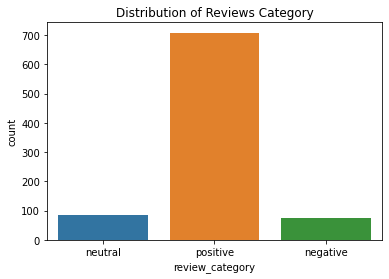

In [69]:
sns.countplot(df['review_category']).set_title("Distribution of Reviews Category")